/mnt/batch/tasks/shared/LS_root/mounts/clusters/student461/code/Users/student46/DL/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/student461/code/Users/student46/DL
===========iteration0=========
SGD:2.206160268103287
===========iteration100=========
SGD:0.21478269510637998
===========iteration200=========
SGD:0.16049940971514792
===========iteration300=========
SGD:0.22973775707603372
===========iteration400=========
SGD:0.06984077236062453
===========iteration500=========
SGD:0.07145338147008347
===========iteration600=========
SGD:0.05274434394759188
===========iteration700=========
SGD:0.13191493519941078
===========iteration800=========
SGD:0.02170297194446052
===========iteration900=========
SGD:0.05286270557867987
===========iteration1000=========
SGD:0.1321388205155924
===========iteration1100=========
SGD:0.02172410506263034
===========iteration1200=========
SGD:0.045558429981906276
===========iteration1300=========
SGD:0.0341389757666849
===========iteration1400========

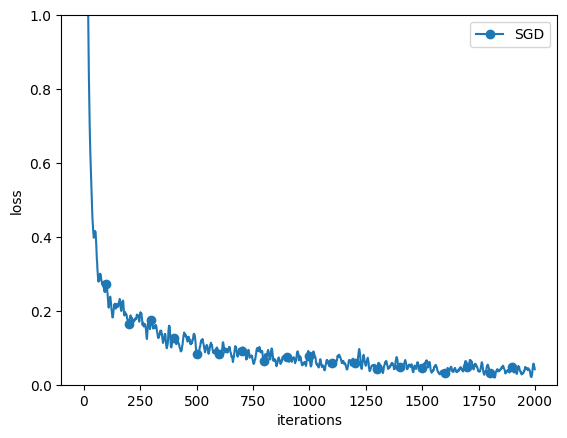

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

#데이터 가져오기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

optimizers = {}
optimizers['SGD'] = SGD()
optimizers['SGD'] = Momentum()
optimizers['SGD'] = AdaGrad()
optimizers['SGD'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size = 10
        )
    train_loss[key] = []


#훈련

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    
    if i % 100 == 0:
        print("===========" + "iteration" + str(i) + "=========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

    
# 그래프
markers = {"SGD": "o", "Momentum":"x", "AdaGrad":"s", "Adam":"D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x,smooth_curve(train_loss[key]), marker=markers[key],markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0,1)
plt.legend()
plt.show()